# Задание к лабораторной работе №8 по машинному обучению

линейная регрессия, полиномиаьная регрессия, регуляризация, логистическая регрессия 

Датасет для задачи регрессии - load_diabetes

Датасет для задачи классификации - load_breast_cancer

1. Регрессия. Применить линейную (и модели с регуляризацией) и полиномиальную регрессию к датасету load_diabetes. Вывести метрики R2, MSE, MAE для двух моделей. Построить scatterplot predicted vs. true.
2. Классификация. Найти оптимальное значение параметра регуляризации $C$ с помощью LogisticRegressionCV – перебора параметров по сетке с последующей кросс-валидацией. Этот класс создан специально для логистической регрессии (для нее известны эффективные алгоритмы перебора параметров), для произвольной модели мы бы использовали GridSearchCV, RandomizedSearchCV. Построить график зависимости метрики ROC-AUC от параметра С.
3. Выбрать порог классификации для LogisticRegression на основе метрики  

In [503]:
from sklearn.datasets import load_diabetes, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegressionCV
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score, roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures, scale
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np

In [585]:
# Загрузка датасета
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [587]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [618]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [620]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [593]:
poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly.fit(X_train, y_train)
y_pred_poly = poly.predict(X_test)

In [622]:
print("Linear Regression:")
print(f"R2: {r2_score(y_test, y_pred_lr)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr)}")

print("\nRidge Regression:")
print(f"R2: {r2_score(y_test, y_pred_ridge)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_ridge)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_ridge)}")

print("\nLasso Regression:")
print(f"R2: {r2_score(y_test, y_pred_lasso)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lasso)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lasso)}")

print("\nPolynome:")
print(f"R2: {r2_score(y_test, y_pred_poly)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_poly)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_poly)}")

Linear Regression:
R2: 0.4772897164322617
MSE: 2821.7509810013107
MAE: 41.91937845679274

Ridge Regression:
R2: 0.4233440269603015
MSE: 3112.9664151980814
MAE: 45.463527699337135

Lasso Regression:
R2: 0.36189802861957876
MSE: 3444.670824977634
MAE: 49.20790052364459

Polynome:
R2: 0.41297706916211485
MSE: 3168.9304439471757
MAE: 44.221395889447265


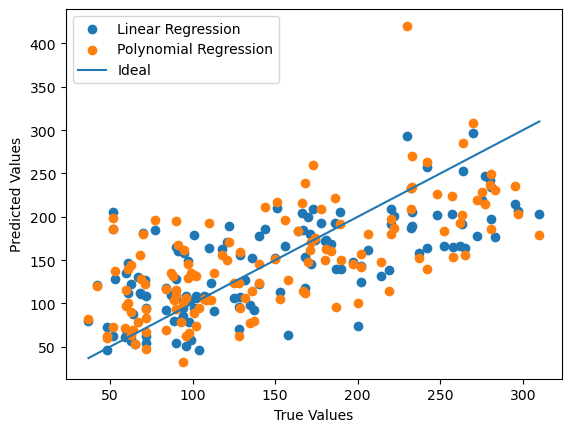

In [624]:
plt.scatter(y_test, y_pred_lr, label="Linear Regression")
plt.scatter(y_test, y_pred_poly, label="Polynomial Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '-', label='Ideal')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

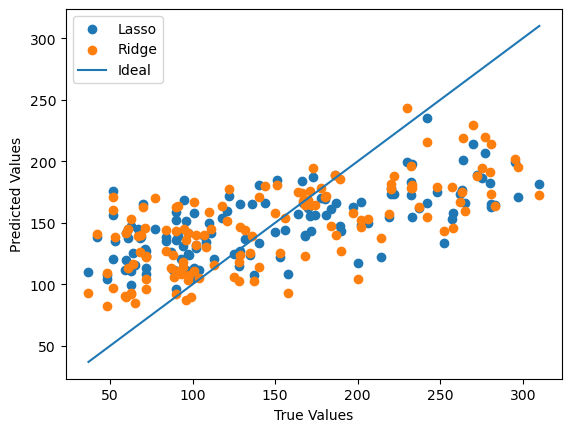

In [626]:
plt.scatter(y_test, y_pred_lasso, label="Lasso")
plt.scatter(y_test, y_pred_ridge, label="Ridge")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '-', label='Ideal')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

**Вывод для пункта 1:**  

Линейная регрессия показала наилучшие результаты среди всех моделей. Наибольший коэффициент детерминации (R^2) указывает на то, что эта модель лучше всего объясняет дисперсию целевой переменной. Также она имеет наименьшие значения MSE и MAE, что свидетельствует о более точных предсказаниях.

In [579]:
сancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [581]:
lrcv = LogisticRegressionCV(Cs=np.arange(0.1,2,0.1), cv=10, scoring='roc_auc', max_iter=10000)
lrcv.fit(X_train,y_train)

LogisticRegressionCV(Cs=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                     cv=10, max_iter=10000, scoring='roc_auc')

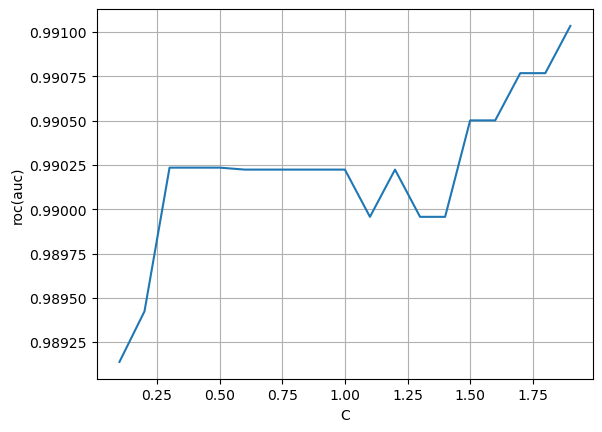

In [583]:
plt.plot(lrcv.Cs_,lrcv.scores_[1].mean(0))
plt.grid()
plt.xlabel('C')
plt.ylabel('roc(auc)')
plt.show()

In [485]:
print(f'Best C: {lrcv.C_[0]}')

Best C: 1.9000000000000001


In [487]:
y_pred_proba = lrcv.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_proba)

0.997501469723692

C:\Users\iljen\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


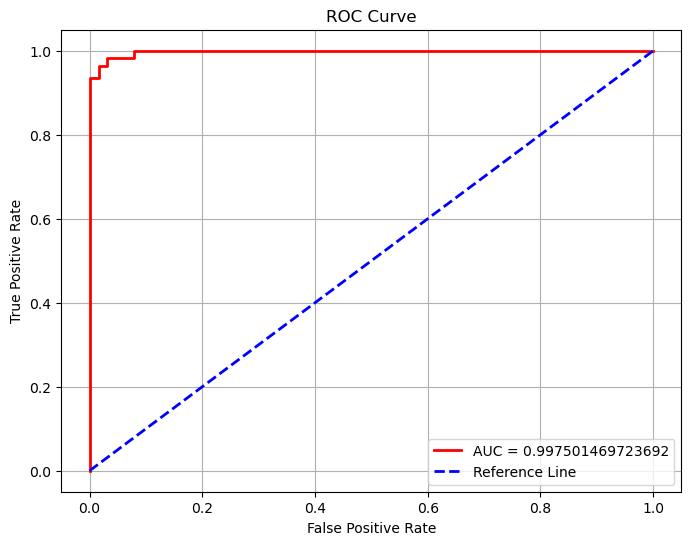

In [539]:
best_model = LogisticRegression(C=searcher.C_[0], random_state=42)
best_model.fit(X_train, y_train)
y_proba = best_model.predict_proba(X_train)[:, 1]
fpr, tpr, thr = roc_curve(y_test, y_pred_proba)
# Вычисление AUC
auc = roc_auc_score(y_test, y_pred_proba)
# Построение ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='r', lw=2, label=f'AUC = {auc:}')
plt.plot([0, 1], [0, 1], color='b', lw=2, linestyle='--', label='Reference Line')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Построен график зависимости метрики ROC-AUC от параметра C
График ROC-кривой демонстрирует высокое качество модели классификации.
Модель показывает высокую точность и значительное превосходство над случайным предсказанием.
Это подтверждается значением AUC, которое близко к 1 (0,997501), что указывает на отличную способность модели различать классы.

In [632]:
print(f'tp_rate = {tpr.max()} при пороге {trh[tpr.argmax()]}\nfp_rate при данном значении равно {fpr[tpr.argmax()]}')

tp_rate = 1.0 при пороге 0.043870261223816855
fp_rate при данном значении равно 0.07936507936507936
